`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


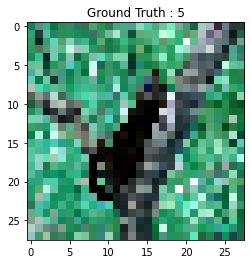

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 878 samples, validate on 220 samples
Epoch 1/10
878/878 [==============================] - 2s 2ms/step - loss: 0.3359 - accuracy: 0.8989 - val_loss: 0.3137 - val_accuracy: 0.9000
Epoch 2/10
878/878 [==============================] - 2s 2ms/step - loss: 0.3065 - accuracy: 0.9051 - val_loss: 0.2963 - val_accuracy: 0.9077
Epoch 3/10
878/878 [==============================] - 2s 2ms/step - loss: 0.2973 - accuracy: 0.9084 - val_loss: 0.2901 - val_accuracy: 0.9100
Epoch 4/10
878/878 [==============================] - 2s 2ms/step - loss: 0.2941 - accuracy: 0.9093 - val_loss: 0.2897 - val_accuracy: 0.9109
Epoch 5/10
878/878 [==============================] - 2s 2ms/step - loss: 0.2937 - accuracy: 0.9093 - val_loss: 0.2881 - val_accuracy: 0.9109
Epoch 6/10
878/878 [=============

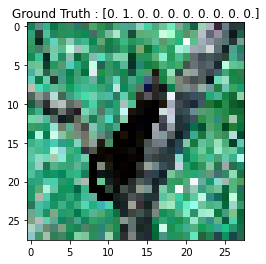

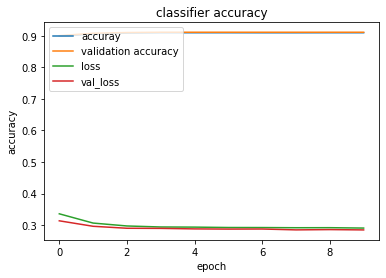

In [1]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Dropout, Input
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()

from google.colab import drive
drive.mount('/content/drive')

label=['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9']

import glob
import cv2
images_training=[]
c=0
for filename in glob.glob('/content/drive/My Drive/10-monkey-species/training/training/n0/*.jpg'):
    image = cv2.imread(filename)
    output_image = cv2.resize(image, (28,28))
    images_training.append([output_image,0])

for filename in glob.glob('/content/drive/My Drive/10-monkey-species/training/training/n1/*.jpg'):
    image = cv2.imread(filename)
    output_image = cv2.resize(output_image, (28,28))
    images_training.append([output_image,1])

for filename in glob.glob('/content/drive/My Drive/10-monkey-species/training/training/n2/*.jpg'):
    image = cv2.imread(filename)
    output_image = cv2.resize(output_image, (28,28))
    images_training.append([output_image,2])

for filename in glob.glob('/content/drive/My Drive/10-monkey-species/training/training/n3/*.jpg'):
    image = cv2.imread(filename)
    output_image = cv2.resize(output_image, (28,28))
    images_training.append([output_image,3])

for filename in glob.glob('/content/drive/My Drive/10-monkey-species/training/training/n4/*.jpg'):
    image = cv2.imread(filename)
    output_image = cv2.resize(output_image, (28,28))
    images_training.append([output_image,4])

for filename in glob.glob('/content/drive/My Drive/10-monkey-species/training/training/n5/*.jpg'):
    image = cv2.imread(filename)
    output_image = cv2.resize(output_image, (28,28))
    images_training.append([output_image,5])

for filename in glob.glob('/content/drive/My Drive/10-monkey-species/training/training/n6/*.jpg'):
    image = cv2.imread(filename)
    output_image = cv2.resize(output_image, (28,28))
    images_training.append([output_image,6])

for filename in glob.glob('/content/drive/My Drive/10-monkey-species/training/training/n7/*.jpg'):
    image = cv2.imread(filename)
    output_image = cv2.resize(output_image, (28,28))
    images_training.append([output_image,7])

for filename in glob.glob('/content/drive/My Drive/10-monkey-species/training/training/n8/*.jpg'):
    image = cv2.imread(filename)
    output_image = cv2.resize(output_image, (28,28))
    images_training.append([output_image,8])

for filename in glob.glob('/content/drive/My Drive/10-monkey-species/training/training/n9/*.jpg'):
    image = cv2.imread(filename)
    output_image = cv2.resize(output_image, (28,28))
    images_training.append([output_image,9])

x=[]
y=[]
for im,label in images_training:
  x.append(im)
  y.append(label)

x=np.array(x).reshape(-1,28,28,3)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=3)

import matplotlib.pyplot as plt
plt.imshow(x_train[10,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(y_train[10]))
plt.show()

x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

classifier = Sequential()
classifier.add(Conv2D(64, (3, 3), input_shape=(x_train.shape[1:]), padding='same', activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(64, activation='relu', kernel_constraint=maxnorm(3)))
classifier.add(Dropout(0.3))
classifier.add(Dense(num_classes, activation='softmax'))

epochs = 10
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
classifier.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

x1=classifier.predict_classes(x_test[[2],:])
print(x1[0])
print(y_test[2])

past=classifier.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=64)

import matplotlib.pyplot as plt
plt.imshow(x_test[2,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(y_test[2]))
plt.show()

classifier.save("mod.h5")

import matplotlib.pyplot as plt
plt.plot(past.history['accuracy'])
plt.plot(past.history['val_accuracy'])
plt.plot(past.history['loss'])
plt.plot(past.history['val_loss'])
plt.title('classifier accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()